# Data analyst

## Load libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

## Load data

In [2]:
ROOT_PATH = os.pardir

RAW_DATA_PATH = ROOT_PATH + '\\data\\raw\\'

# print(os.path.abspath(os.pardir))


In [3]:
measure1_df = pd.read_csv(RAW_DATA_PATH + 'measure1_smartphone_sens.csv')
measure1_df.columns = measure1_df.columns.str.strip()

In [4]:
measure1_df.insert(0, 'datetime', pd.to_datetime(measure1_df['timestamp'], unit='ms'))
measure1_df.head()

,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,2015-01-30 14:51:23.421,1422629483421,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0,0,0
1,2015-01-30 14:51:23.520,1422629483520,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0,0,0
2,2015-01-30 14:51:23.620,1422629483620,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0,0,0
3,2015-01-30 14:51:23.723,1422629483723,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0,0,0
4,2015-01-30 14:51:23.822,1422629483822,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0,0,0


In [5]:
measure1_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18354 entries, 0 to 18353
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             18354 non-null  datetime64[ns]
 1   timestamp            18354 non-null  int64         
 2   AccelerationX        18354 non-null  float64       
 3   AccelerationY        18354 non-null  float64       
 4   AccelerationZ        18354 non-null  float64       
 5   MagneticFieldX       18354 non-null  float64       
 6   MagneticFieldY       18354 non-null  float64       
 7   MagneticFieldZ       18354 non-null  float64       
 8   Z-AxisAgle(Azimuth)  18354 non-null  float64       
 9   X-AxisAngle(Pitch)   18354 non-null  float64       
 10  Y-AxisAngle(Roll)    18354 non-null  float64       
 11  GyroX                18354 non-null  int64         
 12  GyroY                18354 non-null  int64         
 13  GyroZ                18354 non-

In [49]:
print(f'The first day of the measure 1 is {measure1_df.datetime.dt.date.min()} and the last day is {measure1_df.datetime.dt.date.max()}.')

The first day of the measure 1 is 2015-01-30 and the last day is 2015-02-05.


### Timestamp measure 1

In [50]:
m1_timestamp_df = pd.read_csv(RAW_DATA_PATH + 'measure1_timestamp_id.csv',
                              header=None, names=['arrival_ts', 'departure_ts', 'place_id'])
m1_timestamp_df.head()

,arrival_ts,departure_ts,place_id
0,1422629490743,1422629492743,34
1,1422629495152,1422629499732,94
2,1422629501522,1422629505849,95
3,1422629507213,1422629511556,35
4,1422629513047,1422629517152,36


In [51]:
m1_timestamp_df.insert(0, 'arrival_dt', pd.to_datetime(m1_timestamp_df['arrival_ts'], unit='ms'))
m1_timestamp_df.insert(2, 'departure_dt', pd.to_datetime(m1_timestamp_df['departure_ts'], unit='ms'))

In [52]:
m1_timestamp_df.sort_values(by='arrival_dt').head(10)


,arrival_dt,arrival_ts,departure_dt,departure_ts,place_id
0,2015-01-30 14:51:30.743,1422629490743,2015-01-30 14:51:32.743,1422629492743,34
1,2015-01-30 14:51:35.152,1422629495152,2015-01-30 14:51:39.732,1422629499732,94
2,2015-01-30 14:51:41.522,1422629501522,2015-01-30 14:51:45.849,1422629505849,95
3,2015-01-30 14:51:47.213,1422629507213,2015-01-30 14:51:51.556,1422629511556,35
4,2015-01-30 14:51:53.047,1422629513047,2015-01-30 14:51:57.152,1422629517152,36
5,2015-01-30 14:51:58.651,1422629518651,2015-01-30 14:52:01.776,1422629521776,96
6,2015-01-30 14:52:03.052,1422629523052,2015-01-30 14:52:05.921,1422629525921,97
7,2015-01-30 14:52:07.786,1422629527786,2015-01-30 14:52:10.685,1422629530685,37
8,2015-01-30 14:52:12.364,1422629532364,2015-01-30 14:52:15.214,1422629535214,38
9,2015-01-30 14:52:17.055,1422629537055,2015-01-30 14:52:20.053,1422629540053,98


In [165]:
m1_timestamp_df.tail(30)

,arrival_dt,arrival_ts,departure_dt,departure_ts,place_id
294,2015-02-04 10:05:16.733,1423044316733,2015-02-04 10:05:19.584,1423044319584,296
295,2015-02-04 10:05:21.156,1423044321156,2015-02-04 10:05:24.387,1423044324387,290
296,2015-02-04 10:05:26.081,1423044326081,2015-02-04 10:05:28.761,1423044328761,284
297,2015-02-04 10:05:30.641,1423044330641,2015-02-04 10:05:33.396,1423044333396,278
298,2015-02-04 10:05:35.218,1423044335218,2015-02-04 10:05:38.018,1423044338018,268
299,2015-02-04 10:05:39.530,1423044339530,2015-02-04 10:05:42.296,1423044342296,258
300,2015-02-04 10:05:43.983,1423044343983,2015-02-04 10:05:46.730,1423044346730,257
301,2015-02-04 10:05:48.442,1423044348442,2015-02-04 10:05:50.442,1423044350442,267
302,2015-02-04 13:17:45.782,1423055865782,2015-02-04 13:17:51.639,1423055871639,21
303,2015-02-04 13:17:54.559,1423055874559,2015-02-04 13:17:57.753,1423055877753,22


In [54]:
m1_timestamp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   arrival_dt    324 non-null    datetime64[ns]
 1   arrival_ts    324 non-null    int64         
 2   departure_dt  324 non-null    datetime64[ns]
 3   departure_ts  324 non-null    int64         
 4   place_id      324 non-null    int64         
dtypes: datetime64[ns](2), int64(3)
memory usage: 12.8 KB


In [173]:
print('Samples in place 2:', measure1_df[(measure1_df.timestamp >= 1423127565596) & (measure1_df.timestamp <= 1423127569877)].count()[0])

Samples in place 2: 42


In [174]:
print('Samples in place 2:', measure1_df[(measure1_df.timestamp >= 1423127571881) & (measure1_df.timestamp <= 1423127575826)].count()[0])

Samples in place 2: 40


### Join sensors measures with timestamps id

In [175]:
def return_place_id(timestamp):
    return m1_timestamp_df[(m1_timestamp_df.arrival_ts <= timestamp) & (m1_timestamp_df.departure_ts >= timestamp)]['place_id']

In [176]:
measure1_df['place_id'] = measure1_df.apply(lambda: return_place_id(x) for x in measure1_df.timestamp)

In [ ]:
measure1_df.head()

### Points mapping

In [55]:
points_df = pd.read_excel(RAW_DATA_PATH + 'PointsMapping.ods', engine='odf', index_col=0)
points_df.head()

,X,Y
ID,,
1,0.6,0.6
2,1.2,0.6
3,1.8,0.6
4,0.6,1.2
5,1.8,1.2


In [56]:
points_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 1 to 325
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       325 non-null    float64
 1   Y       325 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


In [57]:
points_df.iloc[0, 0]

0.6

In [58]:
points_df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            316, 317, 318, 319, 320, 321, 322, 323, 324, 325],
           dtype='int64', name='ID', length=325)

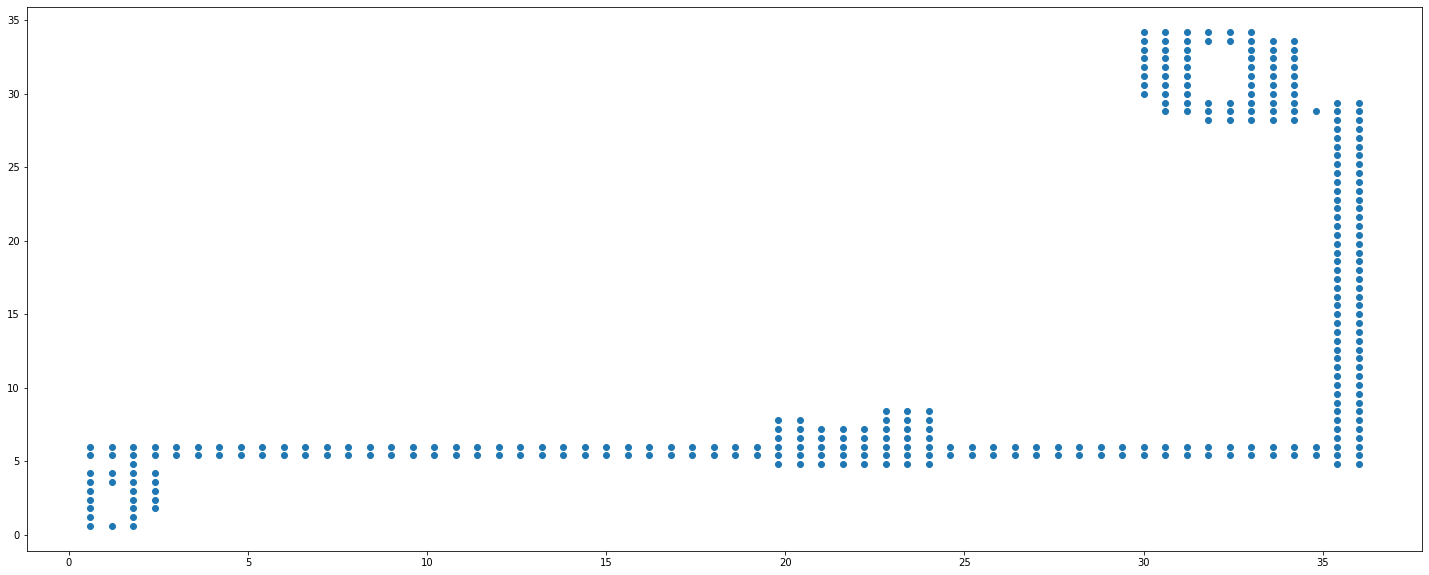

In [162]:
plt.figure(figsize=(25, 10))
plt.scatter(points_df.X, points_df.Y)
# for i, label in enumerate(points_df.index):
#     plt.text(points_df.iloc[i, 0], points_df.iloc[i, 1], label)

In [60]:
import plotly.express as px

fig = px.scatter(points_df, x="X", y="Y", text=range(0, 325))

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='GDP and Life Expectancy (Americas, 2007)'
)

fig.show()

In [61]:
m1_timestamp_df.head()

,arrival_dt,arrival_ts,departure_dt,departure_ts,place_id
0,2015-01-30 14:51:30.743,1422629490743,2015-01-30 14:51:32.743,1422629492743,34
1,2015-01-30 14:51:35.152,1422629495152,2015-01-30 14:51:39.732,1422629499732,94
2,2015-01-30 14:51:41.522,1422629501522,2015-01-30 14:51:45.849,1422629505849,95
3,2015-01-30 14:51:47.213,1422629507213,2015-01-30 14:51:51.556,1422629511556,35
4,2015-01-30 14:51:53.047,1422629513047,2015-01-30 14:51:57.152,1422629517152,36


In [96]:
points_df

,X,Y
ID,,
1,0.6,0.6
2,1.2,0.6
3,1.8,0.6
4,0.6,1.2
5,1.8,1.2
...,...,...
321,30.6,34.2
322,31.2,34.2
323,31.8,34.2


### Smartphone WIFI - Measure 1

In [ ]:
col = [f'WAP{str(num).zfill(3)}' for num in range(1, 128)]
# col.insert(0, 'id')

In [99]:
m1_wifi_df = pd.read_csv(RAW_DATA_PATH + 'measure1_smartphone_wifi.csv',
                              header=None, names=col)
m1_wifi_df.index.name = 'id'
m1_wifi_df.index = range(1,326)
m1_wifi_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127
1,-100,-100,-100,-100,-82,-82,-100,-100,-100,-100,...,-100,-71,-71,-60,-100,-78,-100,-100,-86,-86
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
3,-100,-100,-100,-100,-90,-100,-100,-100,-100,-100,...,-100,-70,-69,-66,-100,-100,-100,-100,-86,-86
4,-100,-100,-100,-100,-88,-87,-100,-100,-100,-100,...,-100,-70,-75,-69,-100,-81,-100,-100,-86,-86
5,-100,-100,-100,-100,-80,-82,-100,-100,-100,-100,...,-100,-71,-71,-65,-63,-83,-100,-100,-100,-100


Insert the coordinates

In [97]:
points_df

,X,Y
ID,,
1,0.6,0.6
2,1.2,0.6
3,1.8,0.6
4,0.6,1.2
5,1.8,1.2
...,...,...
321,30.6,34.2
322,31.2,34.2
323,31.8,34.2


In [103]:
m1_wifi_df['x'] = [points_df.loc[id, 'X'] for id in m1_wifi_df.index]
m1_wifi_df['y'] = [points_df.loc[id, 'Y'] for id in m1_wifi_df.index]

In [104]:
m1_wifi_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,x,y
1,-100,-100,-100,-100,-82,-82,-100,-100,-100,-100,...,-71,-60,-100,-78,-100,-100,-86,-86,0.6,0.6
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,1.2,0.6
3,-100,-100,-100,-100,-90,-100,-100,-100,-100,-100,...,-69,-66,-100,-100,-100,-100,-86,-86,1.8,0.6
4,-100,-100,-100,-100,-88,-87,-100,-100,-100,-100,...,-75,-69,-100,-81,-100,-100,-86,-86,0.6,1.2
5,-100,-100,-100,-100,-80,-82,-100,-100,-100,-100,...,-71,-65,-63,-83,-100,-100,-100,-100,1.8,1.2


### Smartphone WIFI - Measure 2

In [123]:
m2_wifi_df = pd.read_csv(RAW_DATA_PATH + 'measure2_smartphone_wifi.csv',
                              header=None, names=col)
m2_wifi_df.index.name = 'id'
m2_wifi_df.index = range(1,326)
m2_wifi_df.head(100)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127
1,-100,-100,-100,-100,-82,-83,-100,-100,-100,-100,...,-100,-71,-71,-60,-100,-88,-100,-100,-85,-83
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
3,-100,-100,-100,-100,-85,-88,-100,-100,-100,-100,...,-100,-72,-70,-67,-100,-88,-100,-100,-87,-84
4,-100,-100,-100,-100,-79,-79,-100,-100,-100,-100,...,-100,-71,-70,-67,-100,-88,-100,-100,-85,-84
5,-100,-100,-100,-100,-83,-85,-100,-100,-100,-100,...,-100,-69,-68,-62,-100,-100,-100,-100,-84,-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-100,-100,-100,-100,-84,-84,-100,-100,-100,-100,...,-100,-49,-50,-61,-100,-90,-100,-100,-100,-100
97,-100,-100,-100,-100,-84,-84,-100,-100,-100,-100,...,-100,-54,-53,-58,-100,-100,-100,-100,-87,-88
98,-100,-100,-100,-100,-82,-83,-100,-100,-100,-100,...,-100,-49,-49,-56,-52,-100,-100,-100,-87,-88
99,-100,-100,-100,-100,-88,-88,-100,-100,-100,-100,...,-100,-50,-51,-56,-53,-86,-100,-100,-87,-88


In [124]:
m2_wifi_df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,-88.990769,-88.846154,-76.415385,-76.196923,-93.252308,-93.670769,-88.156923,-88.236923,-99.815385,-99.406154,...,-89.160000,-80.403077,-80.581538,-82.203077,-86.596923,-98.406154,-72.021538,-72.972308,-97.686154,-97.258462
std,14.592507,13.991213,23.677418,23.899571,7.996780,8.089349,14.135696,13.995233,1.656379,2.721875,...,13.319632,21.994822,22.315159,19.735175,18.960338,4.385860,20.089679,19.930028,5.367940,5.756448
min,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
25%,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-86.000000,-92.000000,-100.000000,-100.000000
50%,-100.000000,-100.000000,-85.000000,-83.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,-100.000000,-84.000000,-100.000000,-88.000000,-100.000000,-100.000000,-73.000000,-73.000000,-100.000000,-100.000000
75%,-73.000000,-73.000000,-52.000000,-52.000000,-86.000000,-86.000000,-74.000000,-74.000000,-100.000000,-100.000000,...,-77.000000,-64.000000,-63.000000,-65.000000,-77.000000,-100.000000,-59.000000,-55.000000,-100.000000,-100.000000
max,-54.000000,-61.000000,-30.000000,-30.000000,-72.000000,-74.000000,-59.000000,-59.000000,-85.000000,-85.000000,...,-58.000000,-33.000000,-32.000000,-36.000000,-37.000000,-83.000000,-29.000000,-29.000000,-79.000000,-78.000000


Insert the coordinates

In [125]:
m2_wifi_df['x'] = [points_df.loc[id, 'X'] for id in m2_wifi_df.index]
m2_wifi_df['y'] = [points_df.loc[id, 'Y'] for id in m2_wifi_df.index]

In [126]:
m2_wifi_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,x,y
1,-100,-100,-100,-100,-82,-83,-100,-100,-100,-100,...,-71,-60,-100,-88,-100,-100,-85,-83,0.6,0.6
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,1.2,0.6
3,-100,-100,-100,-100,-85,-88,-100,-100,-100,-100,...,-70,-67,-100,-88,-100,-100,-87,-84,1.8,0.6
4,-100,-100,-100,-100,-79,-79,-100,-100,-100,-100,...,-70,-67,-100,-88,-100,-100,-85,-84,0.6,1.2
5,-100,-100,-100,-100,-83,-85,-100,-100,-100,-100,...,-68,-62,-100,-100,-100,-100,-84,-79,1.8,1.2


## Analyze data

In [64]:
measure1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18354 entries, 0 to 18353
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             18354 non-null  datetime64[ns]
 1   timestamp            18354 non-null  int64         
 2   AccelerationX        18354 non-null  float64       
 3   AccelerationY        18354 non-null  float64       
 4   AccelerationZ        18354 non-null  float64       
 5   MagneticFieldX       18354 non-null  float64       
 6   MagneticFieldY       18354 non-null  float64       
 7   MagneticFieldZ       18354 non-null  float64       
 8   Z-AxisAgle(Azimuth)  18354 non-null  float64       
 9   X-AxisAngle(Pitch)   18354 non-null  float64       
 10  Y-AxisAngle(Roll)    18354 non-null  float64       
 11  GyroX                18354 non-null  int64         
 12  GyroY                18354 non-null  int64         
 13  GyroZ                18354 non-

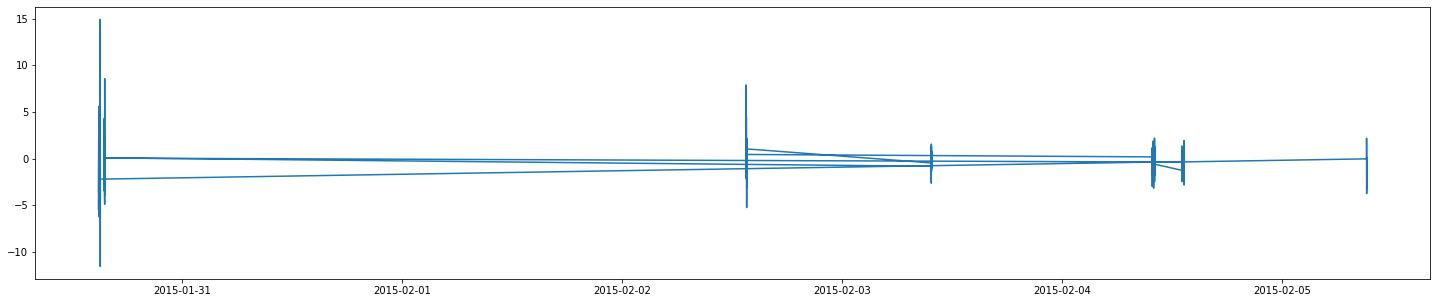

In [65]:
plt.figure(figsize=(25, 5))
plt.plot(measure1_df.datetime, measure1_df.AccelerationX)

The data is not sorted.

In [66]:
# Sort the dataframe
measure1_df = measure1_df.sort_values(by='datetime')

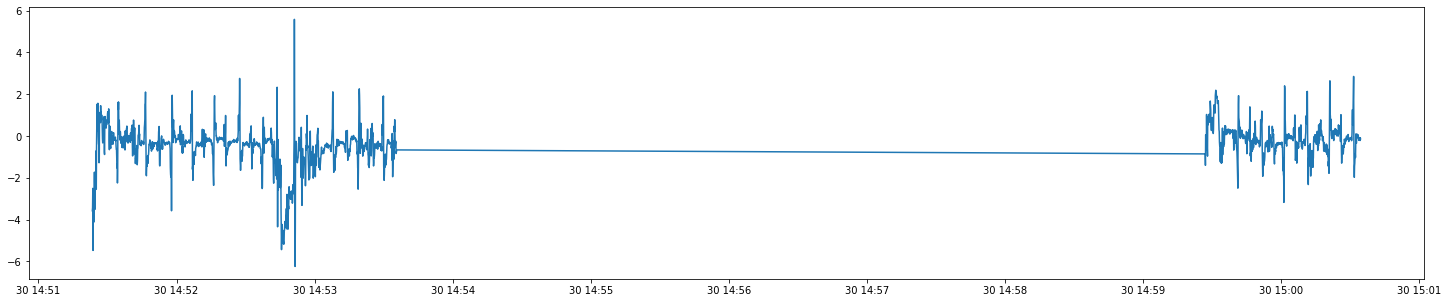

In [67]:
rng = range(0, 2000)
plt.figure(figsize=(25, 5))
plt.plot(measure1_df.datetime[rng], measure1_df.AccelerationX[rng])


In [68]:
import plotly.express as px
import pandas as pd

fig = px.line(measure1_df.iloc[rng], x='datetime', y='AccelerationX', title='Time Series of acceleration in x')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [69]:
fig = px.line(measure1_df, x='datetime', y='AccelerationX', title='Time Series of acceleration in x')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [49]:
measure1_df[measure1_df.datetime < '2015-02-01']

,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,2015-01-30 14:51:23.421,1422629483421,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0,0,0
1,2015-01-30 14:51:23.520,1422629483520,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0,0,0
2,2015-01-30 14:51:23.620,1422629483620,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0,0,0
3,2015-01-30 14:51:23.723,1422629483723,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0,0,0
4,2015-01-30 14:51:23.822,1422629483822,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7582,2015-01-30 15:34:25.370,1422632065370,0.234,3.081,8.493,18.6,-6.2,-22.9,275.674,-19.931,1.479,0,0,0
7583,2015-01-30 15:34:25.469,1422632065469,0.320,2.860,9.183,16.6,-6.6,-23.7,272.381,-17.291,1.902,0,0,0
7584,2015-01-30 15:34:25.569,1422632065569,0.866,3.435,8.819,16.6,-5.7,-24.5,279.988,-21.188,5.217,0,0,0
7585,2015-01-30 15:34:25.669,1422632065669,0.071,3.157,8.781,16.6,-2.5,-25.5,290.684,-19.773,0.426,0,0,0


In [60]:
# import plotly.express as px

# # px.scatter(measure1_df[measure1_df.datetime < '2015-02-01'], x="AccelerationX", y="AccelerationY", animation_frame="datetime",
# px.scatter(measure1_df.iloc[:10], x="AccelerationX", y="AccelerationY", animation_frame="timestamp",
#         #    size="pop", color="continent", hover_name="country",
#         #    log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90]
#            )

## Split labels and features

In [132]:
X = m1_wifi_df.iloc[:,:-2]
y = m1_wifi_df.iloc[:,-2:]

## Build the model

### Linear Regression for Multioutput Regression

In [136]:
from sklearn.linear_model import LinearRegression

# define model
model = LinearRegression()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 2.840 (0.973)


### k-Nearest Neighbors for Multioutput Regression

In [137]:
from sklearn.neighbors import KNeighborsRegressor

# define model
model = KNeighborsRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.373 (0.206)


### Decision Tree

In [133]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.632 (0.304)


### Direct Multioutput Regression

In [145]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 2.707 (0.675)


### Chained Multioutput Regression

In [146]:
from sklearn.multioutput import RegressorChain

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 2.553 (0.546)


### Deep learning

In [158]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(20, input_dim=127, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(2))
model.compile(loss='mae',
              optimizer='adam',
              metrics = ['mae','mse'])

In [159]:
history = model.fit(
    X,
    y,
    batch_size = 10,
    epochs = 100,
    validation_split = 0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/100
26/26 [==============================] - 1s 15ms/step - loss: 30.7345 - mae: 30.7345 - mse: 1657.0751 - val_loss: 19.5361 - val_mae: 19.5361 - val_mse: 504.7333
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 10.7950 - mae: 10.7950 - mse: 208.8676 - val_loss: 28.8547 - val_mae: 28.8547 - val_mse: 925.1702
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 6.7327 - mae: 6.7327 - mse: 97.6357 - val_loss: 28.8532 - val_mae: 28.8532 - val_mse: 898.4607
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 6.5800 - mae: 6.5800 - mse: 91.4655 - val_loss: 25.4615 - val_mae: 25.4615 - val_mse: 718.8903
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 5.9372 - mae: 5.9372 - mse: 78.6261 - val_loss: 26.5273 - val_mae: 26.5273 - val_mse: 751.6694
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 6.1147 - mae: 6.1147 - mse: 78.5967 - val_loss: 25.9159 - val_mae: 25.9159 - va

In [160]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,30.734497,30.734497,1657.075073,19.536116,19.536116,504.733307,0
1,10.794996,10.794996,208.867569,28.854689,28.854689,925.170166,1
2,6.732671,6.732671,97.635666,28.853155,28.853155,898.460693,2
3,6.580008,6.580008,91.465462,25.461521,25.461521,718.890320,3
4,5.937190,5.937190,78.626144,26.527332,26.527332,751.669373,4
5,6.114680,6.114680,78.596672,25.915873,25.915873,725.217590,5
6,6.273806,6.273806,80.751022,27.494183,27.494183,800.416260,6
7,5.773415,5.773415,70.017632,29.979326,29.979326,941.263123,7
8,5.783432,5.783432,69.004959,22.577204,22.577204,562.238525,8
9,5.367508,5.367508,63.375114,21.763912,21.763912,545.720337,9


In [161]:
def plot_history(history):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
    plt.ylim([0,20])
    plt.legend()

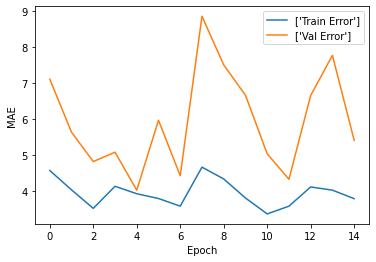

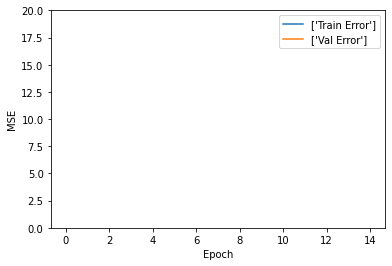

In [157]:
plot_history(history)

## Tune hyperparameters

## Test the model

In [141]:
# define model
model = KNeighborsRegressor()
model.fit(X, y)
print(model.predict(m2_wifi_df.iloc[0:1, :-2]))

[[1.32 1.56]]


c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [143]:
i = 150
test = m2_wifi_df.iloc[i:i+1, :]
print(f'Real point {test.iloc[:, -2:]}')
print(f'Point predicted {model.predict(test.iloc[:, :-2])}')

Real point         x    y
151  34.8  6.0
Point predicted [[27.72  6.  ]]


c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [144]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions = model.predict(m2_wifi_df.iloc[:, :-2])
print("MSE:", mean_squared_error(m2_wifi_df.iloc[:, -2:], predictions))
print("RMSE:", np.sqrt(mean_squared_error(m2_wifi_df.iloc[:, -2:], predictions)))
print("MAE:", mean_absolute_error(m2_wifi_df.iloc[:, -2:], predictions))

MSE: 12.0504516923077
RMSE: 3.471376051698764
MAE: 1.6552615384615392


c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

